# Data

## Importation of libs

In [39]:
# data_management
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from ydata_profiling import ProfileReport
import re, string, unicodedata

# NLP
import inflect


## Upload

In [40]:
file_path = '../data/Resume.csv'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(100000))
encoding = result['encoding']
encoding

'utf-8'

In [41]:
data = pd.read_csv(file_path, encoding=encoding, engine='python')
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


## Understanding

### Amount of data

In [42]:
data.shape

(2484, 4)

### Columns

In [43]:
data.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

### General Information

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


### Distribution

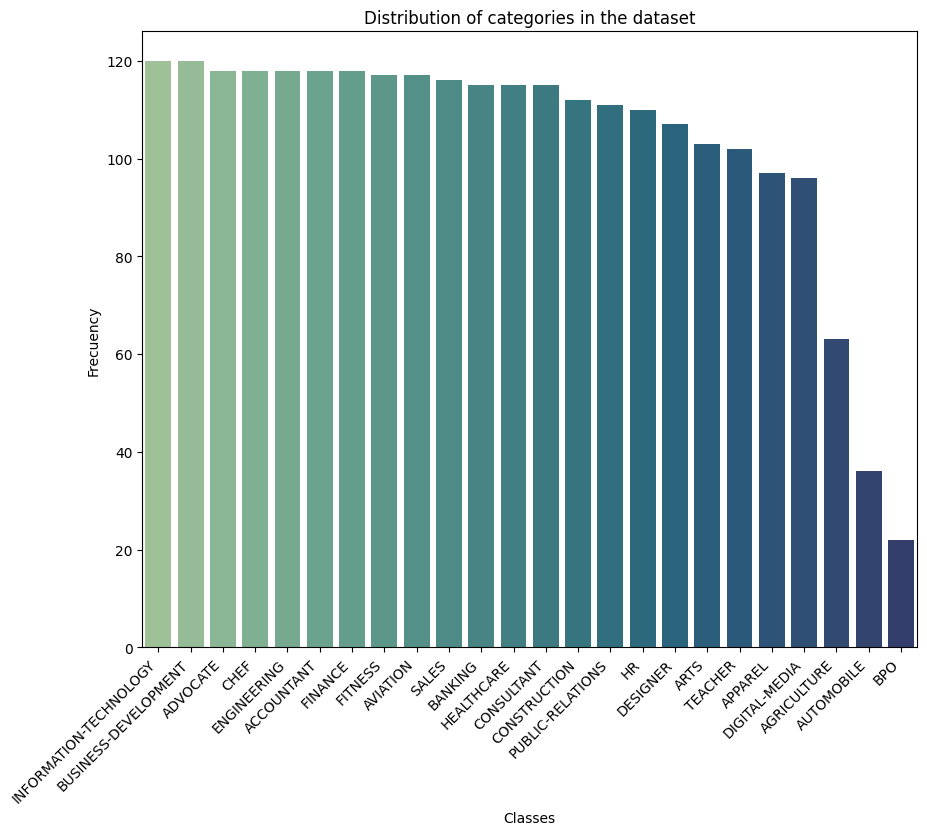

In [45]:
label_counts = data['Category'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette="crest", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classes")
plt.ylabel("Frecuency")
plt.title("Distribution of categories in the dataset")
plt.show()


In [46]:
for label, count in label_counts.items():
    print(f'{label} Resumes: {count}')

INFORMATION-TECHNOLOGY Resumes: 120
BUSINESS-DEVELOPMENT Resumes: 120
ADVOCATE Resumes: 118
CHEF Resumes: 118
ENGINEERING Resumes: 118
ACCOUNTANT Resumes: 118
FINANCE Resumes: 118
FITNESS Resumes: 117
AVIATION Resumes: 117
SALES Resumes: 116
BANKING Resumes: 115
HEALTHCARE Resumes: 115
CONSULTANT Resumes: 115
CONSTRUCTION Resumes: 112
PUBLIC-RELATIONS Resumes: 111
HR Resumes: 110
DESIGNER Resumes: 107
ARTS Resumes: 103
TEACHER Resumes: 102
APPAREL Resumes: 97
DIGITAL-MEDIA Resumes: 96
AGRICULTURE Resumes: 63
AUTOMOBILE Resumes: 36
BPO Resumes: 22


### General Profiling

In [47]:
perfil = ProfileReport(data, title="Data Profiling", explorative=True)
perfil.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [-5:00:00<00:00, -0.00it/s]
